In [125]:
import pandas as pd
import spacy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import *

In [126]:
nlp = spacy.load("en_core_web_sm")

/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [127]:
gold_df = pd.read_csv("gold-dataset-sinha-khandait.csv")

In [128]:
category_keywords = {
    "imports": ["import", "shipment", "foreign purchase", "overseas buy"],
    "tariffs": ["tariff", "duty", "levy", "tax"],
    "prices": [
        "price",
        "rate",
        "usd",
        "rs",
        "ounce",
        "oz",
        "silver",
        "high",
        "low",
        "rise",
        "fall",
        "increase",
        "decrease",
        "settles",
        "close",
        "gain",
        "loss",
        "ends",
    ],
    "production": [
        "mine",
        "production",
        "output",
        "extraction",
        "refinery",
        "smelter",
        "refined",
        "capacity",
    ],
    "demand": [
        "demand",
        "consumption",
        "jewelry",
        "retail",
        "buying",
        "wedding",
        "festive",
        "seasonal",
        "purchase",
        "safe",
        "safe haven",
    ],
    "central_banks": [
        "central bank",
        "reserve bank",
        "cbga",
        "official sector",
        "gold reserves",
        "foreign reserves",
    ],
    "investment": [
        "etf",
        "fund",
        "investment",
        "bullion",
        "gold-backed",
        "investors",
        "holdings",
        "inflow",
        "outflow",
    ],
    "trading": [
        "futures",
        "contract",
        "mcx",
        "session",
        "weekly",
        "day",
        "month",
        "trading",
        "volume",
        "position",
        "open interest",
        "gold futures",
    ],
    "macroeconomy": [
        "fed",
        "dollar",
        "interest rate",
        "inflation",
        "bond",
        "yields",
        "stocks",
        "data",
        "global cues",
        "policy",
        "recession",
        "oil",
        "economic",
    ],
    "international": [
        "country",
        "countries",
        "international",
        "global",
        "brazil",
        "china",
        "us",
        "india",
        "germany",
        "eu",
        "asia",
        "europe",
        "america",
        "africa",
        "balkans",
        "latin america",
    ],
    "other_minimals_commodities": [
        "metals",
        "crude",
        "copper",
        "oil",
        "silver",
        "bitcoin",
        "metals",
        "platinum",
        "palladium",
        "lithium",
        "natural gas",
        "coal",
        "diamond",
        "uranium",
        "nickel",
        "aluminum",
        "zinc",
        "lead",
        "cobalt",
    ],
}

In [129]:
def categorize_headline(headline):
    # keywords of prices is of high frequesncy so we need to avoid over crowding

    # we can change this order
    category_priority = [
        "macroeconomy",
        "international",
        "trading",
        "investment",
        "demand",
        "imports",
        "tariffs",
        "other_minimals_commodities",
        "production",
        "central_banks",
        "prices",
    ]
    doc = nlp(headline.lower())
    lemmas = [token.lemma_ for token in doc]

    category_scores = defaultdict(float)

    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in lemmas:
                # normalize the data
                category_scores[category] += 1 / len(keywords)

    if category_scores:
        # Apply priority to break ties
        sorted_categories = sorted(
            category_scores.items(),
            key=lambda x: (-x[1], category_priority.index(x[0])),
        )
        return sorted_categories[0][0]
    else:
        return "other"

In [130]:
gold_df["category"] = gold_df["News"].apply(categorize_headline)

In [131]:
Counter(gold_df["category"])

Counter({'prices': 5165,
         'other': 1478,
         'trading': 1238,
         'macroeconomy': 985,
         'international': 578,
         'demand': 475,
         'other_minimals_commodities': 190,
         'imports': 185,
         'investment': 153,
         'production': 67,
         'tariffs': 56})

In [132]:
prices_rows = gold_df[gold_df.category == "prices"]["News"]

In [133]:
vectorizer = TfidfVectorizer(max_df=0.8, stop_words="english", ngram_range=(1, 2))
X = vectorizer.fit_transform(prices_rows)

mean_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_n = 100
top_words = np.array(vectorizer.get_feature_names_out())[
    mean_tfidf.argsort()[::-1][:top_n]
]

print(top_words)

['oz' 'futures' 'gold futures' 'prices' 'gold prices' 'ounce' 'week' 'rs'
 'silver' '10' 'dec' 'dec gold' 'lower' 'high' 'falls' 'gains' 'higher'
 'settle' '50' '30' '20' 'gold falls' '70' '80' 'settles' 'gold settles'
 '40' 'gold silver' '90' 'close' 'trade' 'gain' '60' 'ends' 'june' 'low'
 'june gold' 'fall' 'gold ends' 'rise' 'august' 'april' 'august gold'
 'april gold' 'december' 'feb' 'dollar' 'data' 'december gold' 'highest'
 'rises' 'week high' 'feb gold' 'closes' 'futures close' 'loss' 'end'
 'rate' 'global' 'gold gains' 'cues' 'gold closes' '50 oz' '70 oz' 'month'
 'climbs' 'level' 'gold rises' 'lowest' 'global cues' 'near' 'comex'
 'losses' 'gm' '20 oz' '10 gm' 'price' '80 oz' 'gold climbs' 'finish'
 'week low' 'mark' '90 oz' 'session' '40 oz' 'settlement' '60 oz' 'cents'
 '10 oz' 'fed' 'year' 'holds' 'index' '30 oz' 'futures fall' 'morning'
 'nymex' 'demand' 'trades' 'gold holds']


In [134]:
headline_categorization = gold_df[["News", "category"]]

In [135]:
headline_categorization

,News,category
0,"april gold down 20 cents to settle at $1,116.1...",prices
1,gold suffers third straight daily decline,other
2,Gold futures edge up after two-session decline,trading
3,dent research : is gold's day in the sun comin...,trading
4,"Gold snaps three-day rally as Trump, lawmakers...",trading
...,...,...
10565,gold seen falling from 3-week high this week,prices
10566,dominic frisby : now looks like a good time to...,other
10567,Gold heading for worst week since November on ...,prices
10568,august gold up $7.60 at $878.80 an ounce on nymex,prices


In [136]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [144]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(headline_categorization["News"])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

label_encoder = LabelEncoder()
headline_categorization["category_encoded"] = label_encoder.fit_transform(
    headline_categorization["category"]
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_15444/1449339289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_categorization["category_encoded"] = label_encoder.fit_transform(


In [145]:
kmeans = KMeans(n_clusters=11, random_state=42)
headline_categorization["cluster"] = kmeans.fit_predict(X)

sil_score = silhouette_score(X, headline_categorization["cluster"])
print(f"Silhouette Score: {sil_score}")

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_15444/3898332212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_categorization["cluster"] = kmeans.fit_predict(X)


Silhouette Score: 0.01682342717029345


In [152]:
label_encoder.classes_

array(['demand', 'imports', 'international', 'investment', 'macroeconomy',
       'other', 'other_minimals_commodities', 'prices', 'production',
       'tariffs', 'trading'], dtype=object)

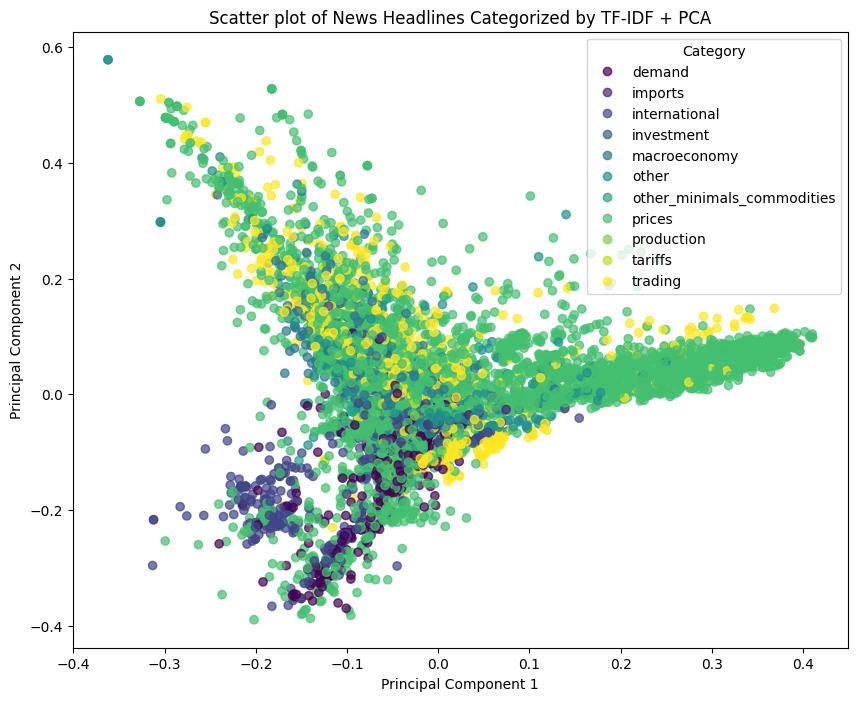

In [ ]:
# plot without the kmeans that was done
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=headline_categorization["category_encoded"],
    cmap="viridis",
    alpha=0.7,
)

plt.title("Scatter plot of News Headlines Categorized by TF-IDF + PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

categories = label_encoder.classes_
handles, _ = scatter.legend_elements()
plt.legend(handles, categories, title="Category")

plt.show()

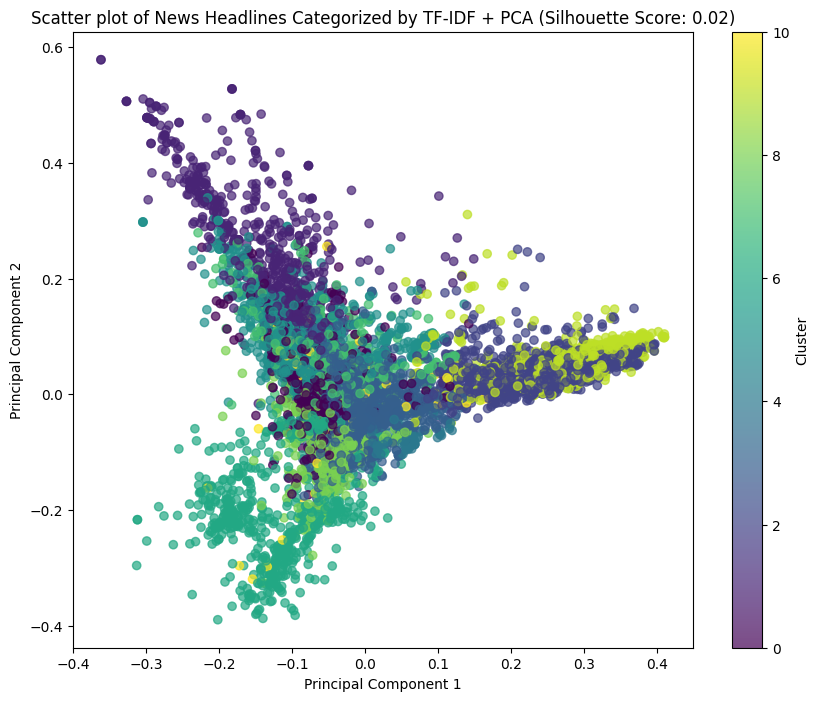

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=headline_categorization["cluster"],
    cmap="viridis",
    alpha=0.7,
)

plt.title(
    f"Scatter plot of News Headlines Categorized by TF-IDF + PCA (Silhouette Score: {sil_score:.2f})"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")

plt.show()